In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [118]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [119]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [120]:
import matplotlib.pyplot as plt
import seaborn as sn

In [121]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [122]:
result = data['stroke'].value_counts()

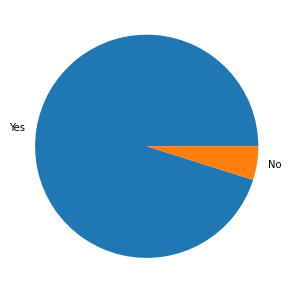

In [123]:
plt.figure(figsize = (5,7))
plt.pie(result,labels = {'Yes':0,'No':1})
plt.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [125]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [126]:
data.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [127]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [128]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [129]:
def onehot_encode(df,column):
    df = df.copy()
    dummies = pd.get_dummies(df[column],prefix = column)
    df = pd.concat([df,dummies],axis = 'columns')
    df = df.drop(column,axis = 'columns')
    return df

In [137]:
def preprocessing_inputs(df):
    df  = df.copy()
    # remove un-needed columns
    df = df.drop(['id'],axis = 'columns')
    # binary encoding
    df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0}) 
    df['Residence_type'] =df['Residence_type'].replace({'Urban':1, 'Rural':0})
    #df = onehot_encode(df,column ='work_type' )
    for column in ['work_type','gender','smoking_status']:
        df = onehot_encode(df ,column = column)
    # _split  df into X,y
    y = df['stroke']
    X = df.drop(['stroke'],axis = 'columns')
    # train_test_split 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True,random_state = 1)
    # fill missing value using KNNImputer method
    impute.fit(X_train)
    X_train = pd.DataFrame(impute.transform(X_train),index = X_train.index,columns = X_train.columns)
    X_test =  pd.DataFrame(impute.transform(X_test),index = X_test.index,columns = X_test.columns)
    # scaler 
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index = X_test.index, columns = X_test.columns)                       
   # X_test  = 
    return X_train,X_test,y_train,y_test

In [138]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [139]:
X_train

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4152,0.525978,-0.327504,-0.239632,0.722864,-1.016775,-0.708689,-0.123429,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,-1.179848,1.179848,0.0,-0.664047,-0.459239,-0.760111,2.347244
4051,0.525978,-0.327504,-0.239632,0.722864,0.983502,2.769942,-0.860040,2.616572,-0.068333,-1.148952,-0.438388,-0.399645,-1.179848,1.179848,0.0,-0.664047,-0.459239,1.315597,-0.426032
5076,-0.402645,-0.327504,-0.239632,0.722864,-1.016775,1.516505,-0.769579,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,1.315597,-0.426032
874,1.631482,-0.327504,-0.239632,0.722864,-1.016775,-1.074698,-0.291428,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-1.179848,1.179848,0.0,-0.664047,-0.459239,1.315597,-0.426032
3534,0.791299,-0.327504,-0.239632,0.722864,0.983502,0.055339,-1.273576,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,1.315597,-0.426032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.127997,-0.327504,-0.239632,0.722864,0.983502,0.708548,0.044570,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-1.179848,1.179848,0.0,-0.664047,-0.459239,1.315597,-0.426032
2763,0.083777,-0.327504,-0.239632,0.722864,-1.016775,-0.925910,0.393491,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,1.505917,-0.459239,-0.760111,-0.426032
905,-0.535305,-0.327504,-0.239632,0.722864,-1.016775,-0.649306,0.858719,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,1.315597,-0.426032
3980,0.083777,-0.327504,-0.239632,0.722864,-1.016775,2.481859,3.365782,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,-0.760111,2.347244


In [140]:
X_test

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4673,-0.048884,-0.327504,-0.239632,0.722864,-1.016775,0.161300,1.065487,2.616572,-0.068333,-1.148952,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,2.177515,-0.760111,-0.426032
3232,1.543042,-0.327504,-0.239632,0.722864,0.983502,-0.604493,0.147954,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,2.177515,-0.760111,-0.426032
3694,-0.667966,-0.327504,-0.239632,-1.383386,0.983502,-0.715311,-0.459427,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,-1.179848,1.179848,0.0,-0.664047,-0.459239,-0.760111,2.347244
1070,1.675702,-0.327504,-0.239632,0.722864,-1.016775,3.105266,-1.015116,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,1.315597,-0.426032
4163,0.393318,-0.327504,-0.239632,0.722864,-1.016775,-0.190360,-0.123429,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,1.505917,-0.459239,-0.760111,-0.426032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-1.884904,-0.327504,-0.239632,-1.383386,0.983502,-0.720830,-0.916901,-0.382179,-0.068333,-1.148952,-0.438388,2.502219,-1.179848,1.179848,0.0,1.505917,-0.459239,-0.760111,-0.426032
4555,-0.933287,-0.327504,-0.239632,-1.383386,-1.016775,-0.081087,1.479024,-0.382179,-0.068333,0.870358,-0.438388,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,-0.760111,2.347244
1056,-1.508149,-0.327504,-0.239632,-1.383386,0.983502,-0.172920,-0.730810,-0.382179,-0.068333,-1.148952,-0.438388,2.502219,-1.179848,1.179848,0.0,1.505917,-0.459239,-0.760111,-0.426032
854,0.127997,-0.327504,-0.239632,0.722864,0.983502,-0.243782,-0.524042,-0.382179,-0.068333,-1.148952,2.281083,-0.399645,0.847567,-0.847567,0.0,-0.664047,-0.459239,1.315597,-0.426032


In [141]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [142]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [144]:
X_train.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03,4088.0,4.088000e+03,4.088000e+03,4.088000e+03,4.088000e+03
mean,-2.751115e-16,-6.337342e-16,1.487449e-16,4.553870e-16,-1.981455e-16,2.430107e-16,3.298623e-16,-4.749680e-16,-4.845684e-17,6.566285e-16,1.196314e-16,-1.917633e-16,3.619631e-16,-3.619631e-16,0.0,4.377885e-16,4.440892e-16,2.442599e-16,-1.354782e-16
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,0.0,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00
min,-1.902592e+00,-3.275041e-01,-2.396324e-01,-1.383386e+00,-1.016775e+00,-1.115979e+00,-2.410800e+00,-3.821794e-01,-6.833339e-02,-1.148952e+00,-4.383883e-01,-3.996452e-01,-1.179848e+00,-8.475666e-01,0.0,-6.640473e-01,-4.592390e-01,-7.601113e-01,-4.260316e-01
25%,-8.006262e-01,-3.275041e-01,-2.396324e-01,-1.383386e+00,-1.016775e+00,-6.398137e-01,-6.661946e-01,-3.821794e-01,-6.833339e-02,-1.148952e+00,-4.383883e-01,-3.996452e-01,-1.179848e+00,-8.475666e-01,0.0,-6.640473e-01,-4.592390e-01,-7.601113e-01,-4.260316e-01
50%,8.377685e-02,-3.275041e-01,-2.396324e-01,7.228642e-01,9.835020e-01,-3.207148e-01,-9.758256e-02,-3.821794e-01,-6.833339e-02,8.703583e-01,-4.383883e-01,-3.996452e-01,8.475666e-01,-8.475666e-01,0.0,-6.640473e-01,-4.592390e-01,-7.601113e-01,-4.260316e-01
75%,7.912993e-01,-3.275041e-01,-2.396324e-01,7.228642e-01,9.835020e-01,1.746557e-01,5.356445e-01,-3.821794e-01,-6.833339e-02,8.703583e-01,-4.383883e-01,-3.996452e-01,8.475666e-01,1.179848e+00,0.0,1.505917e+00,-4.592390e-01,1.315597e+00,-4.260316e-01
max,1.719923e+00,3.053397e+00,4.173058e+00,7.228642e-01,9.835020e-01,3.665980e+00,8.870980e+00,2.616572e+00,1.463413e+01,8.703583e-01,2.281083e+00,2.502219e+00,8.475666e-01,1.179848e+00,0.0,1.505917e+00,2.177515e+00,1.315597e+00,2.347244e+00


In [157]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression,
from sklearn.svm  import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [185]:
models = {
      "                 Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
                             
                                 
                   
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name +' Trannied')

                 Logistic Regression Trannied
                   K-Nearest Neighbors Trannied
                         Decision Tree Trannied


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Support Vector Machine (Linear Kernel) Trannied
   Support Vector Machine (RBF Kernel) Trannied


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network Trannied
                         Random Forest Trannied
                     Gradient Boosting Trannied


In [186]:
for name,model in models.items():
    print(name + ' Accuracy : {:2f}'.format(model.score(X_test,y_test)))

                 Logistic Regression Accuracy : 0.940313
                   K-Nearest Neighbors Accuracy : 0.937378
                         Decision Tree Accuracy : 0.900196
Support Vector Machine (Linear Kernel) Accuracy : 0.941292
   Support Vector Machine (RBF Kernel) Accuracy : 0.941292
                        Neural Network Accuracy : 0.935421
                         Random Forest Accuracy : 0.940313
                     Gradient Boosting Accuracy : 0.939335


In [209]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [210]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + "F1-Score: {:.5f}".format(f1_score(y_test, y_pred)))

Model Performance
-----------------
                 Logistic RegressionF1-Score: 0.00000
                   K-Nearest NeighborsF1-Score: 0.03030
                         Decision TreeF1-Score: 0.10526
Support Vector Machine (Linear Kernel)F1-Score: 0.00000
   Support Vector Machine (RBF Kernel)F1-Score: 0.00000
                        Neural NetworkF1-Score: 0.05714
                         Random ForestF1-Score: 0.03175
                     Gradient BoostingF1-Score: 0.00000


In [211]:
reg = LogisticRegression(
       class_weight = {
           0: 1.0,
           1: 1.0,
       }
)

In [212]:
reg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 1.0})

In [213]:
reg.score(X_test,y_test)

0.9403131115459883

In [214]:
y_pred = reg.predict(X_test)

In [215]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
cm = confusion_matrix(y_test,y_pred)

In [218]:
cm

array([[961,   1],
       [ 60,   0]], dtype=int64)

In [228]:
clr = classification_report(y_test,y_pred)

In [229]:
print("classification_Report\n----------------\n",clr)

classification_Report
----------------
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       962
           1       0.12      0.02      0.03        60

    accuracy                           0.94      1022
   macro avg       0.53      0.50      0.50      1022
weighted avg       0.89      0.94      0.91      1022



# classification 0:1.0,1:2.0

In [219]:
reg = LogisticRegression(
   class_weight = {
       0:1.0,
       1:2.0
   }
)

In [220]:
reg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 2.0})

In [221]:
reg.score(X_test,y_test)

0.9354207436399217

In [222]:
y_pred = reg.predict(X_test)

In [224]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [225]:
cm = confusion_matrix(y_test,y_pred)

In [226]:
cm

array([[955,   7],
       [ 59,   1]], dtype=int64)

In [231]:
clr = classification_report(y_test,y_pred)
print("Classification_Report\n------------\n",clr)

Classification_Report
------------
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       962
           1       0.12      0.02      0.03        60

    accuracy                           0.94      1022
   macro avg       0.53      0.50      0.50      1022
weighted avg       0.89      0.94      0.91      1022



### classification 0:1.0,1:3.0

In [246]:
reg  = LogisticRegression(
   class_weight = {
        0:1.0,
        1:3.0,
   }
)

In [247]:
reg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.0})

In [248]:
y_pred = reg.predict(X_test)

In [249]:
cm = confusion_matrix(y_test,y_pred)

In [250]:
cm

array([[940,  22],
       [ 51,   9]], dtype=int64)

In [251]:
clr = classification_report(y_test,y_pred)
print("Classification_Report\n-------------\n",clr)

Classification_Report
-------------
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       962
           1       0.29      0.15      0.20        60

    accuracy                           0.93      1022
   macro avg       0.62      0.56      0.58      1022
weighted avg       0.91      0.93      0.92      1022



### classification 0:1.0,1:4.0

In [257]:
reg  = LogisticRegression(
   class_weight = {
        0:1.0,
        1:4.0,
   }
)
reg.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 4.0})

In [258]:
y_pred = reg.predict(X_test)

In [259]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[920,  42],
       [ 46,  14]], dtype=int64)

In [260]:
clr = classification_report(y_test,y_pred)
print("Classification_Report\n-------------\n",clr)

Classification_Report
-------------
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       962
           1       0.25      0.23      0.24        60

    accuracy                           0.91      1022
   macro avg       0.60      0.59      0.60      1022
weighted avg       0.91      0.91      0.91      1022

